**Imports:**

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D

import ipywidgets as widgets

# Plotting function

$$
u(x_1,x_2) = (x_1^{\alpha}x_1^{\beta})^{\gamma}
$$

In [2]:
def plot_fig(alpha=0.5,beta=0.5,gamma=1.0,u0=None,x_for_u0=None,elev=30,angle=300,name=None):
    
    # a. calculations
    
    # grids
    x1_max = 1.0
    x2_max = 1.0
    
    x1_vec = np.linspace(0.01,x1_max,100)
    x1_vec_indiff = np.linspace(0.01,x1_max,1000)
    x2_vec = np.linspace(0.01,x2_max,100)
    
    x1,x2 = np.meshgrid(x1_vec,x2_vec)
        
    # utility
    u = (x1**alpha*x2**beta)**gamma
        
    # indifference
    if u0 is None:
        if x_for_u0 is None:
            u0 = ((x1_max/2)**alpha*(x2_max/2)**beta)**gamma
        else:
            u0 = (x_for_u0[0]**alpha*x_for_u0[1]**beta)**gamma

    x2_vec_indiff = (u0**(1/gamma)/x1_vec_indiff**alpha)**(1/beta)
    
    I = x2_vec_indiff <= x2_max # inside limits
    
    # b. figure
    fig = plt.figure(figsize=(12,6),dpi=100)
    
    # 3D
    ax = fig.add_subplot(1,2,1,projection='3d')
    
    ax.plot_surface(x1,x2,u0*np.ones(u.shape),color='black',alpha=0.25)
    ax.plot_surface(x1,x2,u)
    ax.plot3D(x1_vec_indiff[I],x2_vec_indiff[I],u0*np.ones(x1_vec_indiff[I].shape),color='black')
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel(r'utility')
    ax.set_xticks(np.linspace(0.0,1.0,11))
    ax.set_yticks(np.linspace(0.0,1.0,11))
    ax.set_zticks(np.linspace(0.0,1.0,11))
    
    str_title = r'$u(x_1,x_2) = (x_1^{{\alpha}} x_2^{{\beta}})^{{\gamma}}'
    str_title += fr'= (x_1^{{{alpha:.2f}}} x_2^{{{beta:.2f}}})^{{{gamma:.2f}}}$'
    ax.set_title(str_title,fontsize=16)
                 
    ax.view_init(elev,angle)
    
    # 2d
    ax = fig.add_subplot(1,2,2)
    
    ax.plot(x1_vec_indiff[I],x2_vec_indiff[I],color='black')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xticks(np.linspace(0.0,1.0,11))
    ax.set_yticks(np.linspace(0.0,1.0,11))
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0,1.0])
    
    ax.set_title(f'implied indifference curve for $u_0 = {u0:.2f}$')
    
    fig.tight_layout(pad=5.0)
    
    # c. save
    if not name is None: fig.savefig(name)
        

# Static

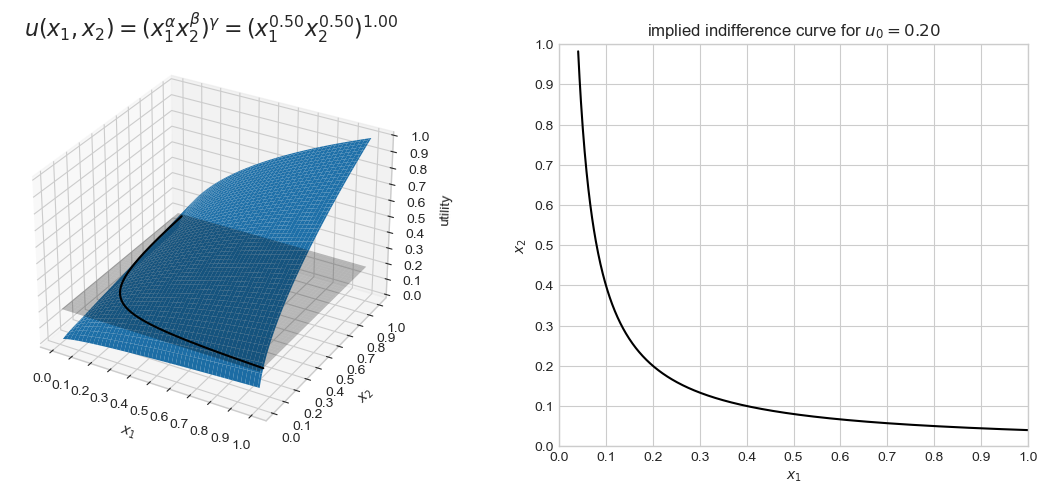

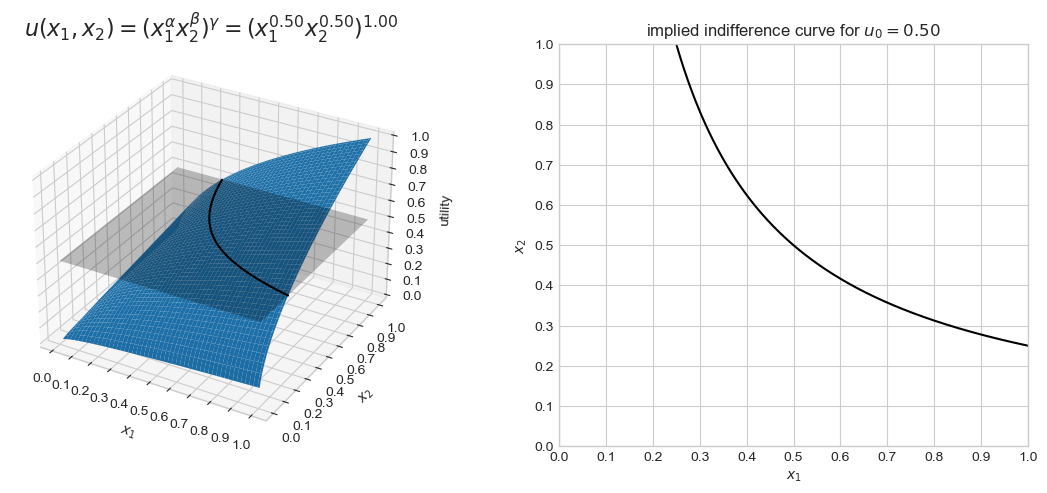

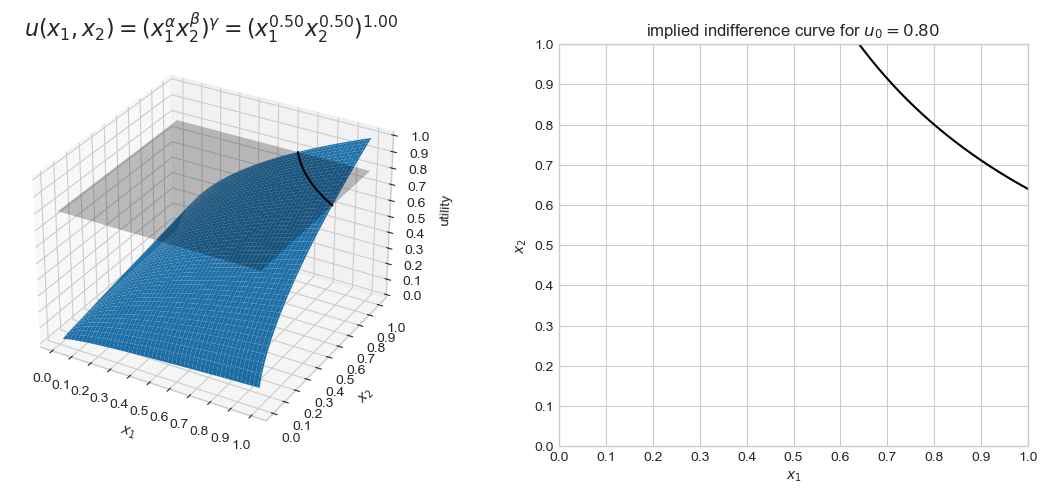

In [3]:
for i,x_for_u0 in enumerate([(0.2,0.2),(0.5,0.5),(0.8,0.8)]):
    plot_fig(x_for_u0=x_for_u0)
    #plot_fig(x_for_u0=x_for_u0,name=f'figs/x_for_u0_{i}.pdf')

# Interactive

In [4]:
widgets.interact(lambda u0,elev,angle: plot_fig(u0=u0,elev=elev,angle=angle),
    u0=widgets.FloatSlider(description='u0',min=0.1,max=1.0,step=0.05,value=0.5), 
    elev=widgets.FloatSlider(description='elevation',min=0,max=180,step=5,value=30),
    angle=widgets.FloatSlider(description='angle',min=0,max=360,step=5,value=300),
);

interactive(children=(FloatSlider(value=0.5, description='u0', max=1.0, min=0.1, step=0.05), FloatSlider(value…

# Montone transformations

## Static

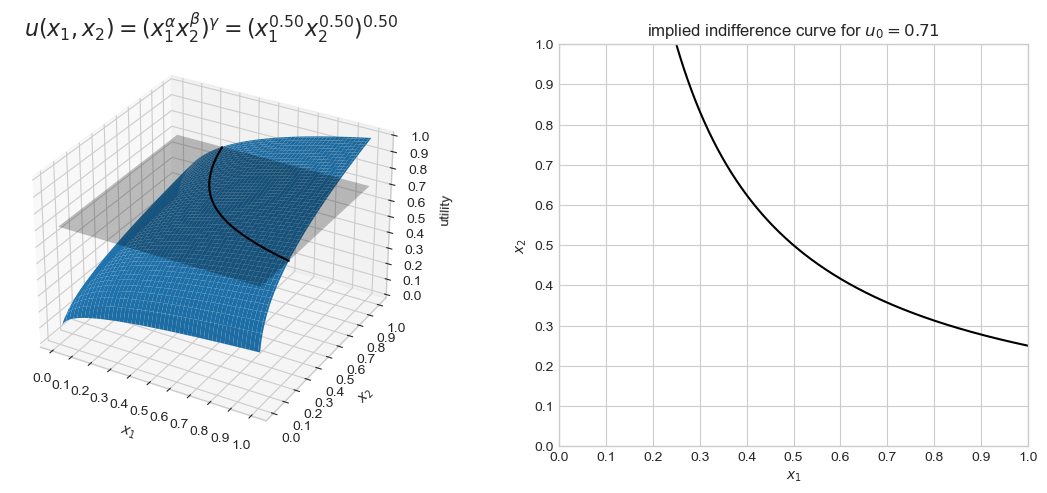

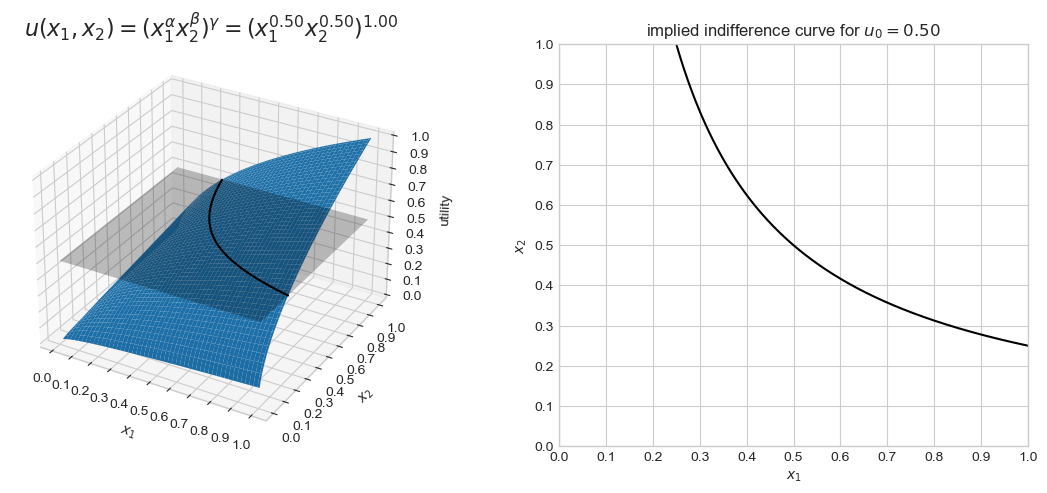

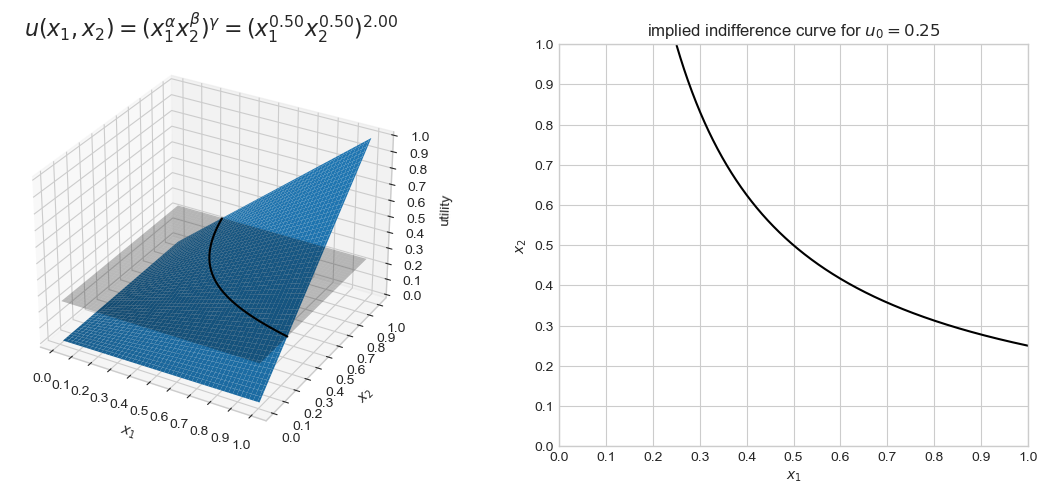

In [5]:
for i,gamma in enumerate([0.5,1.0,2.0]):
    plot_fig(gamma=gamma)
    #plot_fig(gamma=gamma,name=f'figs/gamma_{i}.pdf')

## Interactive

In [6]:
widgets.interact(lambda alpha,beta,gamma,elev,angle: plot_fig(alpha=alpha,beta=beta,gamma=gamma,elev=elev,angle=angle),
    alpha=widgets.FloatSlider(description=r'alpha',min=0.1,max=1.0,step=0.05,value=0.5), 
    beta=widgets.FloatSlider(description=r'beta',min=0.1,max=1.0,step=0.05,value=0.5),
    gamma=widgets.FloatSlider(description=r'gamma',min=0.1,max=2.0,step=0.05,value=0.5),      
    elev=widgets.FloatSlider(description='elevation',min=0,max=180,step=5,value=30), 
    angle=widgets.FloatSlider(description='angle',min=0,max=360,step=5,value=300),
);

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.1, step=0.05), FloatSlider(va…